<a href="https://colab.research.google.com/github/asudupa/DS-Repo/blob/master/Assignment_Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

Keras is installed to ensure latest version (2.2.1) is installed. This will cause function call incompatibility in later cell while defining conv layers in the model.


In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In above cell, all libraries are imported. In later cells functions from these libraries are called

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

MNIST data is is loaded from (https://s3.amazonaws.com/img-datasets/mnist.npz)  location. It is comprised of 60,000 images (for training) of 28x28 grayscale images of handwritten numbers 0 to 9. It has 10,000 images to test the model.
On left side of equation, training data are assigned to X_train, y_train variables, test data are assigned to X_test, y_text.
Here X is data and y is the label of the data stating if the image is on number between 0-9.

(60000, 28, 28)


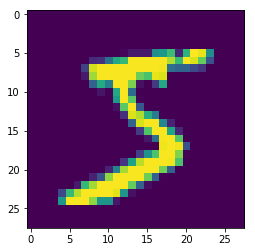

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Shape of X_train is printed to get insight on how many images and of what resolution. There are 60,000 images of 28x28 size.
With matplot, first image is plotted.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Depth of the image should be explictly mentioned for keras, being grayscale image, of 28x28, 28, 28, 1 is mentioned and also 4th dimension as samples count (''[0]''), i.e. 60000 is mentioned.
Line X_train_reshape defined that; adds a dimension for sample count, x, y size and depth as 1.
Same is repeated for test data.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Data type is converted to float to accomdate decimals post normalization.
Data is normalized by dividing by 255.

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Last 10 rows of training labels are printed to check.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Here labels of training and test data are converted from integer 0-9 to categorical format 0-9. This is ensure that the labels are of categorical type than integer. Labels of both train and test are converted.

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Post conversion, labels on last 10 rows are printed. Now it displays as categorical data than integer.

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))   #RF 3,  input channel 28x28x1
model.add(Convolution2D(64, 3, 3, activation='relu'))                          #RF 5,  input channel 26x26x32
model.add(Convolution2D(128, 3, 3, activation='relu'))                         #RF 7,  input channel 24x24x64

model.add(MaxPooling2D(pool_size=(2, 2)))                                      #RF 7,  input channel 22x22x128

model.add(Convolution2D(256, 3, 3, activation='relu'))                         #RF 9,  input channel 11x11x128
model.add(Convolution2D(512, 3, 3, activation='relu'))                         #RF 11, input channel 9x9x256
model.add(Convolution2D(1024, 3, 3, activation='relu'))                        #RF 13, input channel 7x7x512
model.add(Convolution2D(2048, 3, 3, activation='relu'))                        #RF 15, input channel 5x5x1024
model.add(Convolution2D(10, 3, 3, activation='relu'))                          #RF 17, input channel 3x3x2048

model.add(Flatten())                                                           #RF - , input channel 1x1x10 
model.add(Activation('softmax'))                                               #RF - , input channel 1x1x10

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

Sequential model is instantiated, as "model".
Convolutional layers of kernel 3x3, are added in sequence, depth being; 32->64->128->256->512->1024->2048 and finally into 10 categories.
Number of channels seems to be very high for a 28x28 greyscale image.
And also the API call; model.add(Convolution2D(....)) is outdate for the latest Keras version.
This throws warning.   
Model summary shows the receptive field convergence from 26, 26, 32-> 24, 24, 64 -> 22, 22, 128 -> MP (11, 11, 128) -> 9, 9, 256 -> 7, 7, 512, -> 5,5, 1024 -> 3,3, 2048, -> 1,1, 10. 
Summary also states number of parameters in the model.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Model defined in previous cell is compiled, with 'adam' as optimizer and 'accuracy' as tracking metrics.

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 116s 2ms/step - loss: 1.6779 - acc: 0.3835
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.6305 - acc: 0.3975
Epoch 3/10
60000/60000 [==============================] - 111s 2ms/step - loss: 1.6245 - acc: 0.3997
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 1.6186 - acc: 0.4012
Epoch 5/10
60000/60000 [==============================] - 111s 2ms/step - loss: 1.6154 - acc: 0.4016
Epoch 6/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.0617 - acc: 0.2160
Epoch 7/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - a

Here the model is trained, with batch size as 32 and epoch as 10.
Batch size seem to be low, could be increased.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Once trained the model is evaluated against the label.

In [0]:
print(score)

[2.3025851249694824, 0.098]


Score is printed

In [0]:
y_pred = model.predict(X_test)

Here the model is used to predict on test data, to check how well it is trained.

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


last 9 rows of prediction is printed.

Mistakes in the Model creation/definition cell :  
1- Model has too many channels than required. For a gray scale simple image of 28x28,  2048 channels are not required. Model is unable to classify the image and hence accuracy is very low and takes lot of time to train.  
2- There not many features (28x28=784) input image that call for 2084 channels, hence number of channels should be changed to; starting with 32 in first layer  and 64 in next layers. Limiting the number of channels at 64 improves the accuracy significantly to 99%  
3-  Batch size is very low, can be increased to atleast 120.  
4- API call; model.add(Convolution2D(....)) is outdate for the latest Keras version. Updated call should be as "model.add(Conv2D(256, (3, 3), ".... This throws warning "UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)` after removing the cwd from sys.path."  However it is observed that changing the function call to (ConvD(32, (3,3)...)) accuracy dropped to a range of 50% to 70%.


In [0]:
##Following is the corrected model

#from keras.layers import Convolution2D #as Conv2D
from keras.layers import Activation, MaxPooling2D

model2 = Sequential() 

model2.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model2.add(Convolution2D(64, 3, 3, activation='relu'))
model2.add(Convolution2D(64, 3, 3, activation='relu'))


model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Convolution2D(64, 3, 3, activation='relu'))
model2.add(Convolution2D(64, 3, 3, activation='relu'))
model2.add(Convolution2D(64, 3, 3, activation='relu'))
model2.add(Convolution2D(64, 3, 3, activation='relu'))
model2.add(Convolution2D(10, 3, 3, activation='relu'))


model2.add(Flatten())
model2.add(Activation('softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 64)          36928     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `C

In [0]:
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model2.fit(X_train, Y_train, batch_size=120, nb_epoch=10, verbose=1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2186 - acc: 0.9068
Epoch 2/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.2156 - acc: 0.9077
Epoch 3/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.2152 - acc: 0.9078
Epoch 4/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.2161 - acc: 0.9076
Epoch 5/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2128 - acc: 0.9085
Epoch 6/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2167 - acc: 0.9073
Epoch 7/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2132 - acc: 0.9085
Epoch 8/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.2140 - acc: 0.9081
Epoch 9/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2139 - acc: 0.9081
Epoch 10/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2132 - a

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0)

print(score)

[0.2408328490269967, 0.9037]


In [0]:
y_pred2 = model2.predict(X_test)

print(y_pred2[:9])
print(y_test[:9])


[[1.3298888e-11 1.3298888e-11 1.3298888e-11 1.3298888e-11 1.3298888e-11
  1.3298888e-11 1.3298888e-11 1.0000000e+00 1.3298888e-11 1.3298888e-11]
 [6.0240930e-11 6.0240930e-11 1.0000000e+00 6.0240930e-11 6.0240930e-11
  6.0240930e-11 6.0240930e-11 6.0240930e-11 6.0240930e-11 6.0240930e-11]
 [6.1686424e-06 9.9993801e-01 6.1686424e-06 6.1686424e-06 6.1686424e-06
  6.1686424e-06 6.1686424e-06 1.2682934e-05 6.1686424e-06 6.1686424e-06]
 [9.9999988e-01 5.0359827e-09 5.0359827e-09 5.0359827e-09 5.0359827e-09
  5.0359827e-09 8.8303921e-08 5.0359827e-09 9.5249160e-09 4.1547295e-08]
 [3.3409050e-11 3.3409050e-11 3.3409050e-11 3.3409050e-11 1.0000000e+00
  3.3409050e-11 3.3409050e-11 3.3409050e-11 3.3409050e-11 3.3409050e-11]
 [4.3471999e-08 9.9999833e-01 4.3471999e-08 4.3471999e-08 6.8006024e-08
  4.3471999e-08 4.3471999e-08 1.2274419e-06 4.3471999e-08 4.3471999e-08]
 [2.5006683e-09 2.5006683e-09 2.5006683e-09 2.5006683e-09 9.9999952e-01
  2.5006683e-09 2.5006683e-09 1.9347769e-07 2.5006683e-09 

Accuracy of prediction is much better, matches with the labels.